In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

### 张成空间

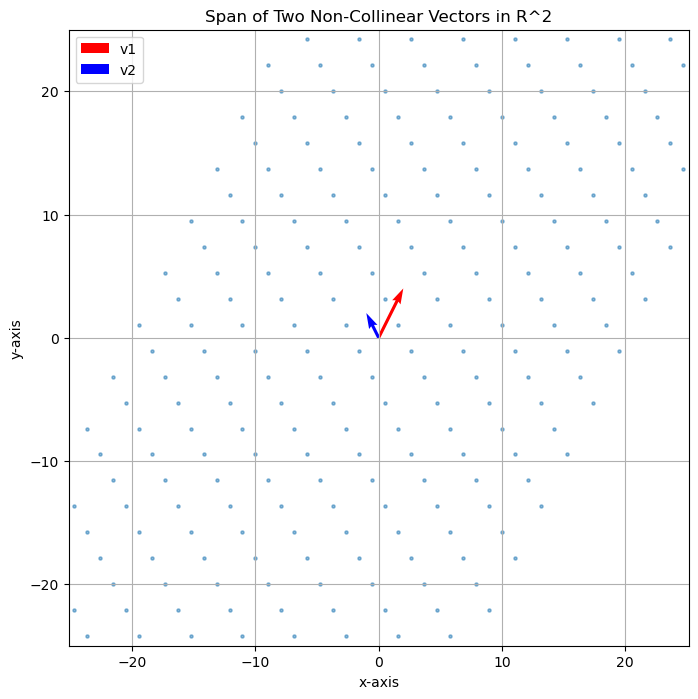

In [3]:
# 定义两个非共线向量
v1 = np.array([2, 4])
v2 = np.array([-1, 2])

# 定义两个共线向量
# v1 = np.array([2, 4])
# v2 = np.array([1, 2])

# 生成标量的网格坐标
n = 20  
k = 10  
a_vals = np.linspace(-k, k, n)
b_vals = np.linspace(-k, k, n)

# 存储生成的向量
span_vectors = []

# 计算所有线性组合
for a in a_vals:
    for b in b_vals:
        w = a * v1 + b * v2
        span_vectors.append(w)

# 转换为NumPy数组
span_vectors = np.array(span_vectors)
#----------------------------------------------------------------------------------------------------------------------
# 绘图部分
# 创建图形
plt.figure(figsize=(8, 8))

# 绘制张成空间的点
plt.scatter(span_vectors[:, 0], span_vectors[:, 1], s=5, alpha=0.5)

# 绘制原始向量 
origin = [0, 0]  # 定义原点
plt.quiver(origin[0], origin[1], v1[0], v1[1], 
           angles='xy', scale_units='xy', scale=1, 
           color='r', label='v1', width=0.005)
plt.quiver(origin[0], origin[1], v2[0], v2[1], 
           angles='xy', scale_units='xy', scale=1, 
           color='b', label='v2', width=0.005)

# 设置图形属性
plt.title('Span of Two Non-Collinear Vectors in R^2')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.xlim(-25, 25)
plt.ylim(-25, 25)
plt.show()

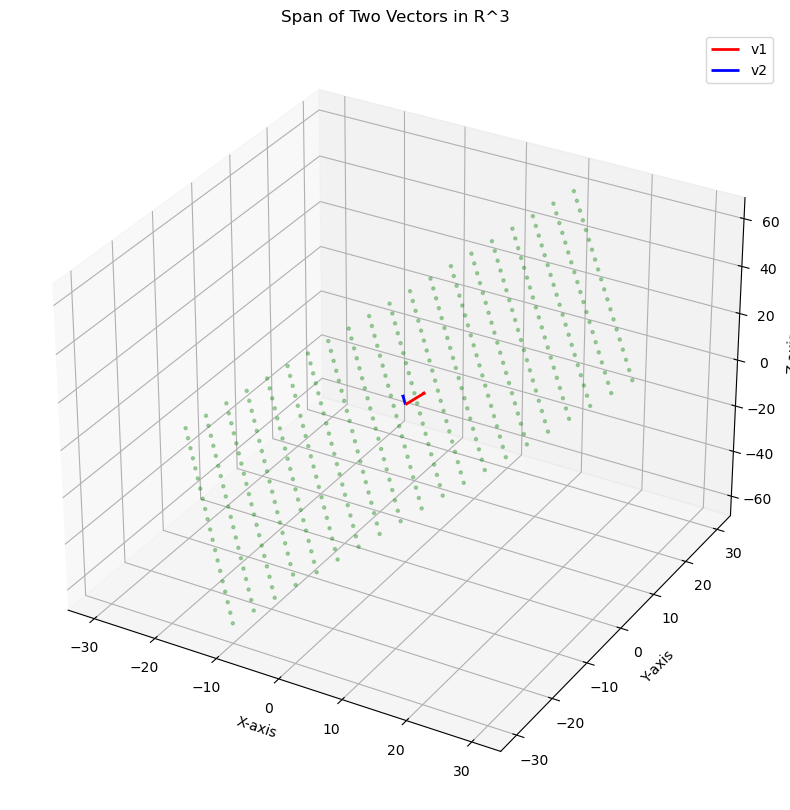

In [7]:
# 定义两个非共线的三维向量
v1_3d = np.array([2, 2, 4])
v2_3d = np.array([-1, 1, 2])

# 生成标量的网格坐标
n = 20  
k = 10  
a_vals = np.linspace(-k, k, n)
b_vals = np.linspace(-k, k, n)

# 存储生成的向量
span_vectors = []

# 计算所有线性组合
for a in a_vals:
    for b in b_vals:
        w = a * v1_3d + b * v2_3d #这里改成两个新的三维向量
        span_vectors.append(w)

# 转换为NumPy数组
span_vectors_3d = np.array(span_vectors)

#----------------------------------------------------------------------------------------------------------------------
# 绘图部分
# （标量生成和线性组合计算代码与任务1a相同）
# ... 
# span_vectors_3d = ...

# 可视化三维张成空间
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制张成空间中的点
ax.scatter(span_vectors_3d[:, 0], span_vectors_3d[:, 1], span_vectors_3d[:, 2], 
           s=5, alpha=0.3, c='green')  # 添加颜色使点更清晰

# 绘制原始向量（修正了参数错误）
ax.quiver(0, 0, 0,          # 起点坐标 (x,y,z)
          v1_3d[0], v1_3d[1], v1_3d[2],  # 方向分量 (u,v,w)
          color='r', length=1.0, arrow_length_ratio=0.1, 
          label='v1', linewidth=2)
ax.quiver(0, 0, 0, 
          v2_3d[0], v2_3d[1], v2_3d[2], 
          color='b', length=1.0, arrow_length_ratio=0.1, 
          label='v2', linewidth=2)

# 设置图形属性
ax.set_title('Span of Two Vectors in R^3')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()

# 设置等比例坐标轴
# max_range = np.array([span_vectors_3d[:,0].max()-span_vectors_3d[:,0].min(),
#                       span_vectors_3d[:,1].max()-span_vectors_3d[:,1].min(),
#                       span_vectors_3d[:,2].max()-span_vectors_3d[:,2].min()]).max()/2.0

# mid_x = (span_vectors_3d[:,0].max()+span_vectors_3d[:,0].min())*0.5
# mid_y = (span_vectors_3d[:,1].max()+span_vectors_3d[:,1].min())*0.5
# mid_z = (span_vectors_3d[:,2].max()+span_vectors_3d[:,2].min())*0.5

# ax.set_xlim(mid_x - max_range, mid_x + max_range)
# ax.set_ylim(mid_y - max_range, mid_y + max_range)
# ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()

### 子空间定理

In [11]:
def is_subspace(generator_func, property_checker, tests=100):
    """
    测试一个集合是否满足子空间的两个封闭性公理
    """
    print(f"开始测试，将进行{tests}次随机测试...")
    
    for i in range(tests):
        # 测试加法封闭性
        u = generator_func()
        v = generator_func()
        w = u + v
        
        if not property_checker(w):
            print(f"加法封闭性测试失败!")
            print(f"u = {u}")
            print(f"v = {v}")
            print(f"u + v = {w}")
            return False
        
        # 测试标量乘法封闭性
        u = generator_func()
        # 随机选择标量，包括负数、零和正数
        c = random.choice([-2, -1, 0, 1, 2, random.uniform(-5, 5)])
        w = c * u
        
        if not property_checker(w):
            print(f"标量乘法封闭性测试失败!")
            print(f"u = {u}")
            print(f"c = {c}")
            print(f"c * u = {w}")
            return False
    
    print("所有测试通过！该集合可能是子空间")
    return True

In [12]:
# 情形1：集合A - R²中所有形如[x,y]且x≥0的向量
def generator_a():
    """生成集合A的随机向量"""
    x = random.uniform(0, 10)  # x ≥ 0
    y = random.uniform(-10, 10)
    return np.array([x, y])

def checker_a(vector):
    """检查向量是否属于集合A"""
    return vector[0] >= 0  # 检查x ≥ 0

print("=== 情形1测试: 集合A (x ≥ 0) ===")
result_a = is_subspace(generator_a, checker_a, tests=50)

=== 情形1测试: 集合A (x ≥ 0) ===
开始测试，将进行50次随机测试...
标量乘法封闭性测试失败!
u = [3.44328749 4.07444878]
c = -2.2380384812278686
c * u = [-7.7062099  -9.11877317]


In [15]:
# 情形2：集合B - R³中所有形如[x,y,x+y]的向量
def generator_b():
    """生成集合B的随机向量"""
    x = random.uniform(-10, 10)
    y = random.uniform(-10, 10)
    return np.array([x, y, x + y])

def checker_b(vector):
    """检查向量是否属于集合B"""
    # 检查第三个分量是否等于前两个分量之和
    # 使用np.isclose处理浮点数精度问题
    return np.isclose(vector[2], vector[0] + vector[1])

print("\n=== 情形2测试: 集合B ([x, y, x+y]) ===")
result_b = is_subspace(generator_b, checker_b, tests=200)


=== 情形2测试: 集合B ([x, y, x+y]) ===
开始测试，将进行200次随机测试...
所有测试通过！该集合可能是子空间


### 向量是否在空间中
#### 练习np.linalg.solve(A, t)求解线性方程组

In [2]:
# is_in_span函数

def is_in_span(target_vector, spanning_set):
    """
    Checks if a target vector is in the span of a set of vectors.

    Args:
        target_vector (np.ndarray): The vector to check.
        spanning_set (list of np.ndarray): The set of vectors that form the span.

    Returns:
        tuple: (True, coeffs) if the vector is in the span,
               (False, None) otherwise.
    """
    # 处理空生成集的情况
    if len(spanning_set) == 0:
        if np.all(target_vector == 0):
            return True, np.array([])
        else:
            return False, None

    # 构造矩阵A
    # 注意要用column_stack而不是row_stack
    A = np.column_stack(spanning_set)
    
    # 检查维度兼容性
    if A.shape[0] != len(target_vector):
        print("Error: The dimension of the spanning vectors does not match the target vector.")
        return False, None
        
    if A.shape[0] != A.shape[1]:
        print("Error: The spanning set does not form a square matrix. Use lstsq for non-square systems.")
        return False, None

    try:
        # 尝试求解方程组
        coeffs = np.linalg.solve(A, target_vector)
        return True, coeffs
    except np.linalg.LinAlgError:
        # 处理奇异矩阵情况
        return False, None

In [3]:
# 测试函数1
v1 = np.array([1,2])
v2 = np.array([0,1])
t1 = np.array([1,3])

is_in, coeffs = is_in_span(t1, [v1, v2])
print(f"Is t1 in the span? {is_in}. Coefficients: {coeffs}")

Is t1 in the span? True. Coefficients: [1. 1.]


In [6]:
# 测试函数2

v1_collinear = np.array([1,2])
v2_collinear = np.array([2,4])
t2 = np.array([1,1])

is_in, coeffs = is_in_span(t2, [v1_collinear, v2_collinear])
print(f"Is t2 in the span of collinear vectors? {is_in}. Coefficients: {coeffs}")

Is t2 in the span of collinear vectors? False. Coefficients: None


### 应用 纠错码

In [5]:
# 学习coefficients = [int(bit) for bit in format(i, f'0{k}b')]这行代码的精髓，这样就不用些循环嵌套了

def is_valid_codeword(codeword, basis):
    """
    检查一个码字是否在F_2上由给定基向量张成的子空间中
    
    参数:
        codeword: 要检查的码字，numpy数组形式
        basis: 基向量列表，每个基向量为numpy数组
    
    返回:
        Boolean: 如果码字在子空间中返回True，否则返回False
    """
    # 获取基向量的数量
    k = len(basis)
    
    # 生成所有可能的线性组合（系数为0或1）
    # 由于是F_2域，每个系数只能是0或1，共2^k种组合
    for i in range(2**k):
        # 将整数i转换为二进制表示，作为系数组合
        coefficients = [int(bit) for bit in format(i, f'0{k}b')]
        
        # 计算线性组合：系数与基向量的线性组合（模2运算）
        linear_combination = np.zeros_like(basis[0])
        for j in range(k):
            linear_combination = (linear_combination + coefficients[j] * basis[j]) % 2
        
        # 检查是否与目标码字匹配
        if np.array_equal(linear_combination, codeword):
            return True
    
    # 如果所有组合都不匹配，则码字不在子空间中
    return False

In [6]:

# 任务4c: 整合所有内容-错误检测
# 定义基向量
b1 = np.array([1, 1, 0, 0])
b2 = np.array([0, 1, 1, 0])
b3 = np.array([0, 0, 1, 1])
parity_basis = [b1, b2, b3]

print("=== 奇偶校验码错误检测演示 ===")

# 创建有效码字：通过对基向量进行线性组合
sent_codeword = (1 * b1 + 0 * b2 + 1 * b3) % 2
print(f"发送的码字: {sent_codeword}")
print(f"该码字是否有效? {is_valid_codeword(sent_codeword, parity_basis)}")

# 模拟传输错误：翻转第二位
received_codeword = sent_codeword.copy()
received_codeword[1] = 1 - received_codeword[1]  # 翻转第二位
print(f"\n接收到的码字(含错误): {received_codeword}")

# 检测错误
print(f"接收到的码字是否有效? {is_valid_codeword(received_codeword, parity_basis)}")


=== 奇偶校验码错误检测演示 ===
发送的码字: [1 1 1 1]
该码字是否有效? True

接收到的码字(含错误): [1 0 1 1]
接收到的码字是否有效? False
